In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (16.0, 8.0)})
plt.rcParams.update({'font.size': 16})

In [2]:
df = pd.read_csv('modifiedExtractedPayloads.csv')

In [3]:
df.head()

,Contains &lt,Contains ScriptTag,Readable,"Contains ""><",Contains '><,Contains And,Contains Percentage,Contains Slash,Contains BackSlash,Contains Plus,...,Contains DoubleSlash,Contains VerticalBar,Contains Power,Contains BrokenBar,Contains Alert,Contains BreakLine,Letters Ratio,Numbers Ratio,Symbols Ratio,Class
0,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0.750000,0.000000,0.250000,Malicious
1,0,0,1,0,0,1,1,1,0,0,...,1,0,0,0,1,1,0.738916,0.014778,0.246305,Malicious
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0.783784,0.018018,0.198198,Malicious
3,0,1,1,1,0,1,0,1,1,0,...,1,0,0,0,1,1,0.761111,0.002778,0.236111,Malicious
4,0,0,1,0,0,1,1,1,0,0,...,1,0,0,0,1,1,0.738916,0.014778,0.246305,Malicious


In [4]:
df.Class.value_counts()

Benign       28068
Malicious    13304
Name: Class, dtype: int64

In [5]:
df.loc[df['Class'] == 'Malicious', 'Class'] = '1'

In [6]:
df.loc[df['Class'] == 'Benign', 'Class'] = '0'

In [7]:
df.Class.value_counts()

0    28068
1    13304
Name: Class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(['Class'],axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
RR= RandomForestClassifier()
RR.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
predictions= RR.predict(X_test)

In [15]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9946    0.9969    0.9958      8388
           1     0.9935    0.9888    0.9912      4024

    accuracy                         0.9943     12412
   macro avg     0.9941    0.9929    0.9935     12412
weighted avg     0.9943    0.9943    0.9943     12412



In [16]:
print(confusion_matrix(y_test,predictions))

[[8362   26]
 [  45 3979]]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9942797292942314

In [18]:
import pickle
pickle_out = open("MLModel.pkl","wb")
pickle.dump(RR, pickle_out)
pickle_out.close()

In [19]:
importances = RR.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

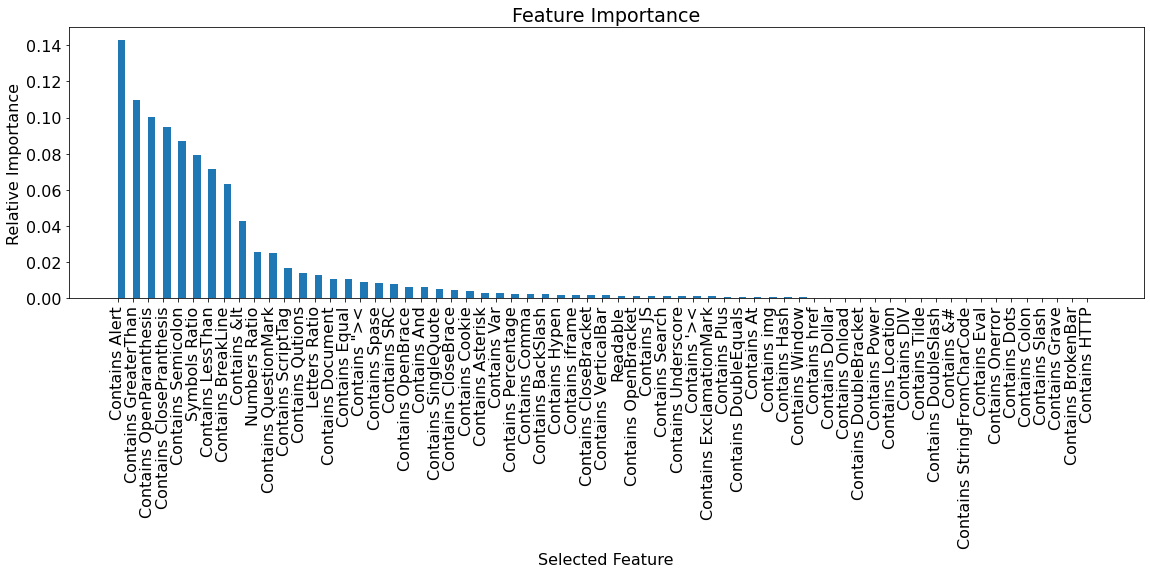

In [20]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='edge', width=0.5)
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.ylabel('Relative Importance')
plt.xlabel('Selected Feature')
plt.show()